## **LENDING CLUB CASE STUDY**
**PROBLEM STATEMENT**: The objective is to analyze historical loan applicant data to identify patterns of default risk, enabling decisions on loan approval, modification, or denial based on the applicant's willingness to repay.









In [ ]:
# Importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the dataset
loan = pd.read_csv('/content/loan.csv')
loan.head()

<ipython-input-2-e698e4b8fa02>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('/content/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## **INSPECTING THE DATASET**


In [ ]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [ ]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [ ]:
# The data inspection is not clearly stating the datatypes and null/non-null values as there are a lot of columns
# Splitting the dataset into numerical and categorical data
numerical_cols = loan.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = loan.select_dtypes(include=['object', 'category']).columns

# Creating separate dataframes for numerical and categorical data
loan_numerical = loan[numerical_cols]
loan_categorical = loan[categorical_cols]


In [ ]:
loan_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 87 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   installment                     39717 non-null  float64
 6   annual_inc                      39717 non-null  float64
 7   dti                             39717 non-null  float64
 8   delinq_2yrs                     39717 non-null  int64  
 9   inq_last_6mths                  39717 non-null  int64  
 10  mths_since_last_delinq          14035 non-null  float64
 11  mths_since_last_record          2786 non-null   float64
 12  open_acc                        

In [ ]:
loan_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 39717 non-null  object
 1   int_rate             39717 non-null  object
 2   grade                39717 non-null  object
 3   sub_grade            39717 non-null  object
 4   emp_title            37258 non-null  object
 5   emp_length           38642 non-null  object
 6   home_ownership       39717 non-null  object
 7   verification_status  39717 non-null  object
 8   issue_d              39717 non-null  object
 9   loan_status          39717 non-null  object
 10  pymnt_plan           39717 non-null  object
 11  url                  39717 non-null  object
 12  desc                 26775 non-null  object
 13  purpose              39717 non-null  object
 14  title                39706 non-null  object
 15  zip_code             39717 non-null  object
 16  addr

In [ ]:
empty_cols = [col for col in loan_numerical.columns if loan_numerical[col].isnull().all()]
loan_num = loan_numerical.drop(columns=empty_cols)
loan_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   installment                 39717 non-null  float64
 6   annual_inc                  39717 non-null  float64
 7   dti                         39717 non-null  float64
 8   delinq_2yrs                 39717 non-null  int64  
 9   inq_last_6mths              39717 non-null  int64  
 10  mths_since_last_delinq      14035 non-null  float64
 11  mths_since_last_record      2786 non-null   float64
 12  open_acc                    39717 non-null  int64  
 13  pub_rec                     397

In [ ]:
empty_cols = [col for col in loan_categorical.columns if loan_categorical[col].isnull().all()]
loan_cat = loan_categorical.drop(columns=empty_cols)
loan_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 39717 non-null  object
 1   int_rate             39717 non-null  object
 2   grade                39717 non-null  object
 3   sub_grade            39717 non-null  object
 4   emp_title            37258 non-null  object
 5   emp_length           38642 non-null  object
 6   home_ownership       39717 non-null  object
 7   verification_status  39717 non-null  object
 8   issue_d              39717 non-null  object
 9   loan_status          39717 non-null  object
 10  pymnt_plan           39717 non-null  object
 11  url                  39717 non-null  object
 12  desc                 26775 non-null  object
 13  purpose              39717 non-null  object
 14  title                39706 non-null  object
 15  zip_code             39717 non-null  object
 16  addr

## **CLEANING THE DATASET**

In [ ]:
loan_combined['emp_length'] = loan_combined['emp_length'].replace({
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}).astype(int)

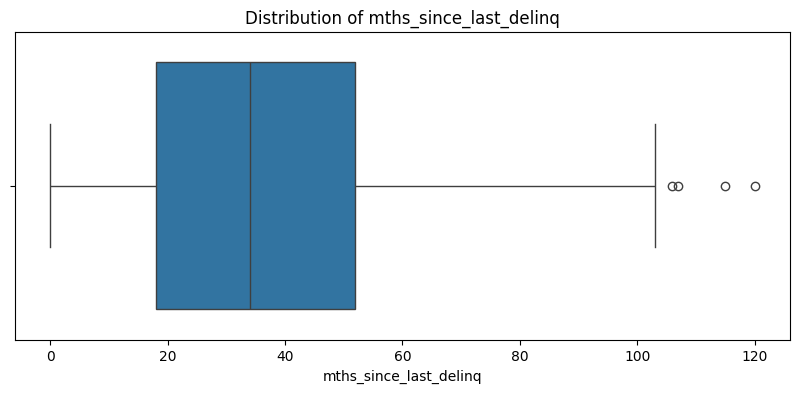

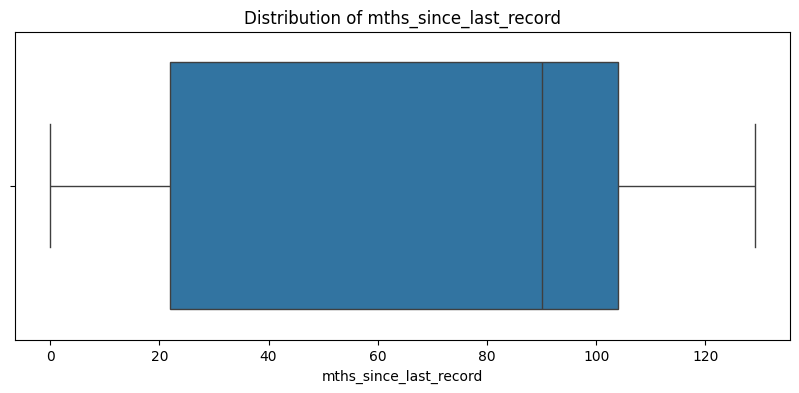

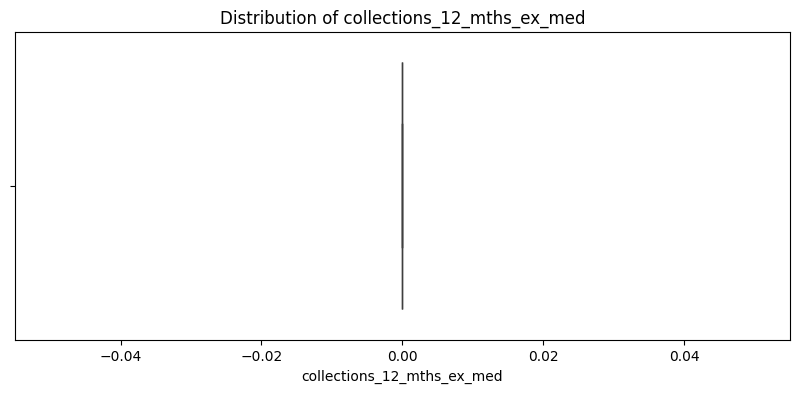

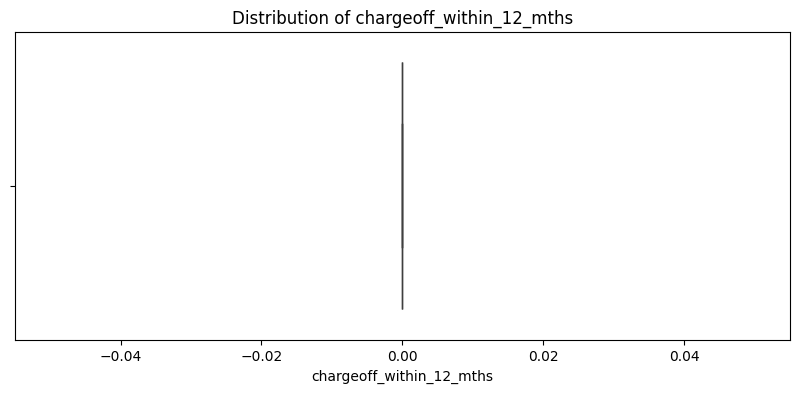

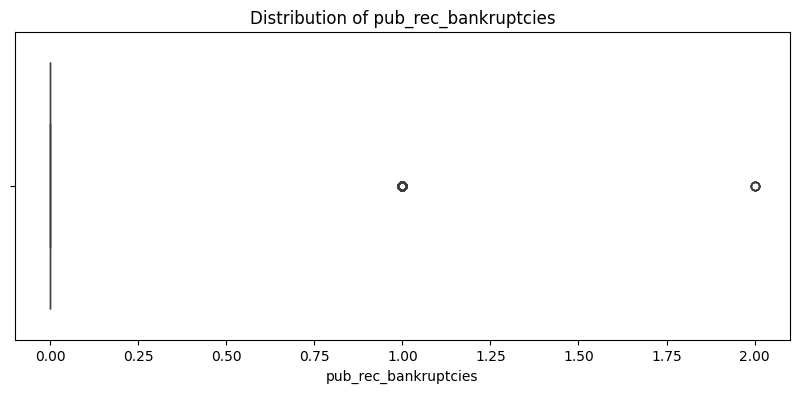

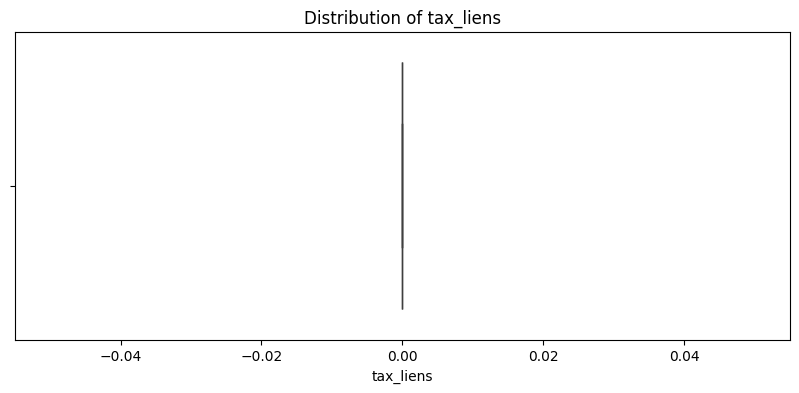

In [ ]:
# Dealing with missing numerical/fact variables
columns_with_missing = ['mths_since_last_delinq', 'mths_since_last_record',
                        'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
                        'pub_rec_bankruptcies', 'tax_liens']
for col in columns_with_missing:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=loan_num[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# Filling numerical NA values with Median, since there are a few outliers
def impute_median(dataframe, column_name):
    median_value = dataframe[column_name].median()
    dataframe[column_name].fillna(median_value, inplace=True)


impute_median(loan_num, 'mths_since_last_delinq')
impute_median(loan_num, 'pub_rec_bankruptcies')
impute_median(loan_num,'mths_since_last_record')
impute_median(loan_num,'collections_12_mths_ex_med')
impute_median(loan_num,'chargeoff_within_12_mths')
impute_median(loan_num,'tax_liens')

In [ ]:
loan_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   installment                 39717 non-null  float64
 6   annual_inc                  39717 non-null  float64
 7   dti                         39717 non-null  float64
 8   delinq_2yrs                 39717 non-null  int64  
 9   inq_last_6mths              39717 non-null  int64  
 10  mths_since_last_delinq      39717 non-null  float64
 11  mths_since_last_record      39717 non-null  float64
 12  open_acc                    39717 non-null  int64  
 13  pub_rec                     397

In [ ]:
# Dealing with missing categorical/dimension variables
categorical_cols_with_na = ['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'last_pymnt_d', 'next_pymnt_d']

# Replace missing values with the mode of each column
for col in categorical_cols_with_na:
    mode_value = loan_cat[col].mode()[0]  # Calculate the mode
    loan_cat[col].fillna(mode_value, inplace=True)  # Fill NA with mode


In [ ]:
loan_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 39717 non-null  object
 1   int_rate             39717 non-null  object
 2   grade                39717 non-null  object
 3   sub_grade            39717 non-null  object
 4   emp_title            39717 non-null  object
 5   emp_length           39717 non-null  object
 6   home_ownership       39717 non-null  object
 7   verification_status  39717 non-null  object
 8   issue_d              39717 non-null  object
 9   loan_status          39717 non-null  object
 10  pymnt_plan           39717 non-null  object
 11  url                  39717 non-null  object
 12  desc                 39717 non-null  object
 13  purpose              39717 non-null  object
 14  title                39717 non-null  object
 15  zip_code             39717 non-null  object
 16  addr

In [ ]:
# Remove '%' sign and convert to float
loan_cat['int_rate'] = loan_cat['int_rate'].str.replace('%', '').astype(float)

# Verify changes
print(loan_cat['int_rate'].head())

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64


### DROPING REDUNDANT/ HIGHLY CORRELATED PARAMETERS

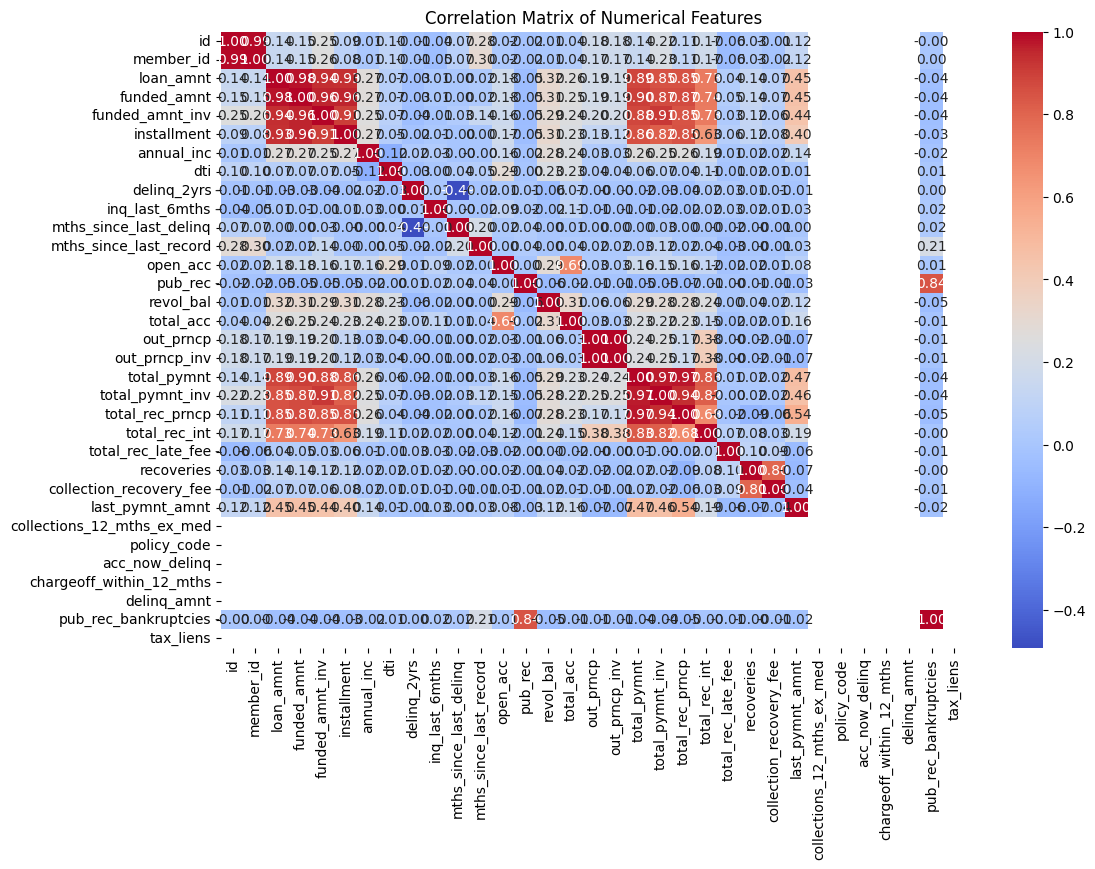

In [ ]:
# Calculate correlation matrix for numerical features
corr_matrix = loan_num.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Dropping a few column since there are no numerical values and are redundant
# Keeping all the categorical variables to perform some univariate/ bivariate analysis
columns_to_drop = ['loan_amnt','funded_amnt_inv','out_prncp_inv','total_pymnt_inv','collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
                   'chargeoff_within_12_mths', 'delinq_amnt']

loan_num.drop(columns=columns_to_drop, inplace=True)
print(loan_num.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   installment              39717 non-null  float64
 4   annual_inc               39717 non-null  float64
 5   dti                      39717 non-null  float64
 6   delinq_2yrs              39717 non-null  int64  
 7   inq_last_6mths           39717 non-null  int64  
 8   mths_since_last_delinq   39717 non-null  float64
 9   mths_since_last_record   39717 non-null  float64
 10  open_acc                 39717 non-null  int64  
 11  pub_rec                  39717 non-null  int64  
 12  revol_bal                39717 non-null  int64  
 13  total_acc                39717 non-null  int64  
 14  out_prncp             

In [ ]:
columns_to_drop = ['initial_list_status','title','zip_code','url','pymnt_plan','application_type','desc']

loan_cat.drop(columns=columns_to_drop, inplace=True)
print(loan_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   term                 39717 non-null  object 
 1   int_rate             39717 non-null  float64
 2   grade                39717 non-null  object 
 3   sub_grade            39717 non-null  object 
 4   emp_title            39717 non-null  object 
 5   emp_length           39717 non-null  object 
 6   home_ownership       39717 non-null  object 
 7   verification_status  39717 non-null  object 
 8   issue_d              39717 non-null  object 
 9   loan_status          39717 non-null  object 
 10  purpose              39717 non-null  object 
 11  addr_state           39717 non-null  object 
 12  earliest_cr_line     39717 non-null  object 
 13  revol_util           39717 non-null  object 
 14  last_pymnt_d         39717 non-null  object 
 15  next_pymnt_d         39717 non-null 

In [ ]:
loan_combined = pd.concat([loan_num, loan_cat], axis=1)
loan_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   installment              39717 non-null  float64
 4   annual_inc               39717 non-null  float64
 5   dti                      39717 non-null  float64
 6   delinq_2yrs              39717 non-null  int64  
 7   inq_last_6mths           39717 non-null  int64  
 8   mths_since_last_delinq   39717 non-null  float64
 9   mths_since_last_record   39717 non-null  float64
 10  open_acc                 39717 non-null  int64  
 11  pub_rec                  39717 non-null  int64  
 12  revol_bal                39717 non-null  int64  
 13  total_acc                39717 non-null  int64  
 14  out_prncp             

In [ ]:
loan_combined.head()

,id,member_id,funded_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,revol_util,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,162.87,24000.0,27.65,0,1,34.0,90.0,...,Verified,Dec-11,Fully Paid,credit_card,AZ,Jan-85,83.70%,Jan-15,Jun-16,May-16
1,1077430,1314167,2500,59.83,30000.0,1.00,0,5,34.0,90.0,...,Source Verified,Dec-11,Charged Off,car,GA,Apr-99,9.40%,Apr-13,Jun-16,Sep-13
2,1077175,1313524,2400,84.33,12252.0,8.72,0,2,34.0,90.0,...,Not Verified,Dec-11,Fully Paid,small_business,IL,Nov-01,98.50%,Jun-14,Jun-16,May-16
3,1076863,1277178,10000,339.31,49200.0,20.00,0,1,35.0,90.0,...,Source Verified,Dec-11,Fully Paid,other,CA,Feb-96,21%,Jan-15,Jun-16,Apr-16
4,1075358,1311748,3000,67.79,80000.0,17.94,0,0,38.0,90.0,...,Source Verified,Dec-11,Current,other,OR,Jan-96,53.90%,May-16,Jun-16,May-16


In [ ]:
loan_combined.to_excel('loan_combined.xlsx', index=False)

## **EXPLORATORY DATA ANALYSIS**

###UNIVARIATE DATA ANALYSIS -
Exploring individual variables to understand their distribution, central tendency, dispersion, and potential anomalies.

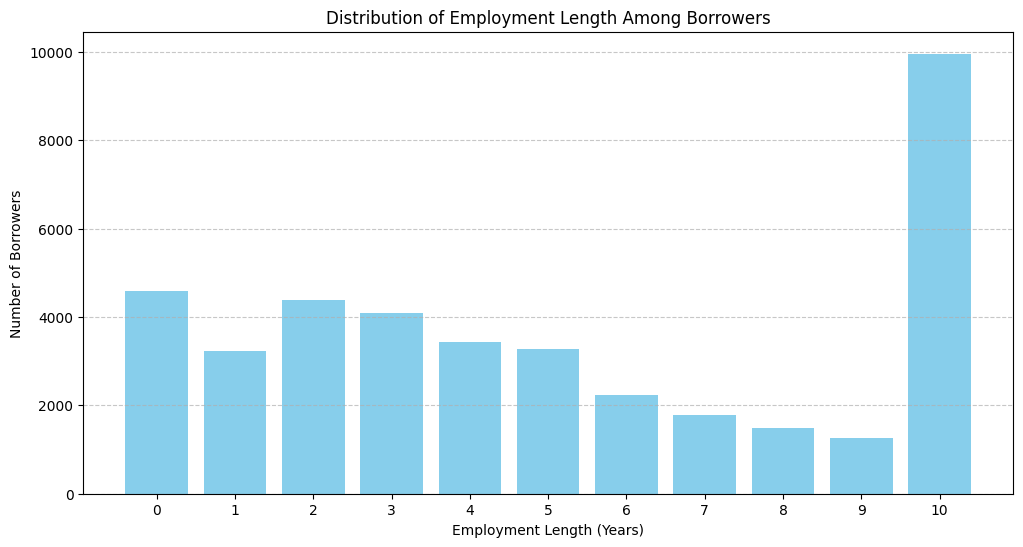

In [ ]:
loan_combined['emp_length'].value_counts()

emp_length = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
borrowers_count = [4583, 3240, 4388, 4095, 3436, 3282, 2229, 1773, 1479, 1258, 9954]

plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(emp_length, borrowers_count, color='skyblue')  # Create a bar plot

# Adding title and labels
plt.title('Distribution of Employment Length Among Borrowers')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Number of Borrowers')

# Show grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

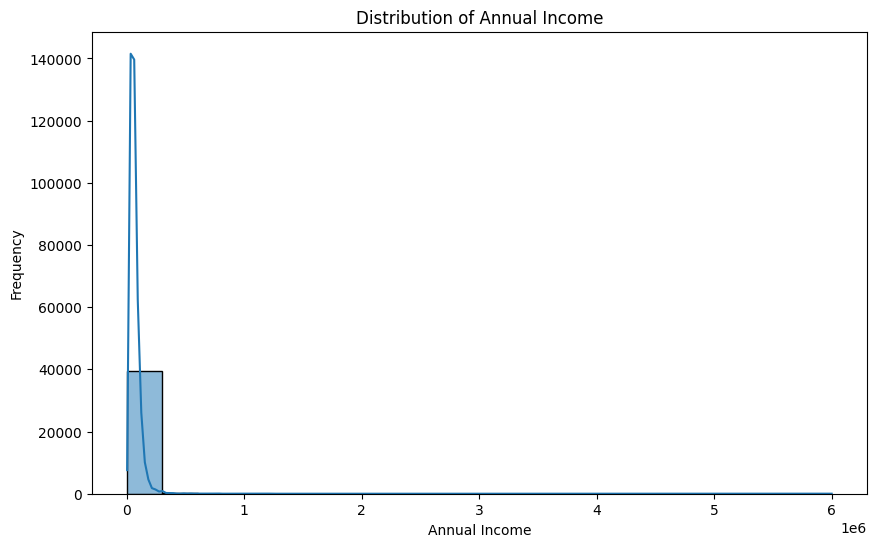

"\nInsight - The frequency of borrowers with lower annual incomes is significantly higher. \nThe highest frequency is observed at the lowest income bracket, which rapidly decreases as income increases.\nThe presence of high-income borrowers is minimal, which might reflect the platform's user base or possibly the general accessibility and appeal of such financial products to lower-income individuals.\nThis could also influence the risk profile of the loan portfolio, as income is a crucial factor in a borrower's ability to repay loans.\n"

In [ ]:
# Annual income distribution - this variable will give an insight inside the ability to pay of all the loan payers
plt.figure(figsize=(10, 6))
sns.histplot(data=loan_combined, x='annual_inc', bins=20, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

"""
Insight - The frequency of borrowers with lower annual incomes is significantly higher.
The highest frequency is observed at the lowest income bracket, which rapidly decreases as income increases.
The presence of high-income borrowers is minimal, which might reflect the platform's user base or possibly the general accessibility and appeal of such financial products to lower-income individuals.
This could also influence the risk profile of the loan portfolio, as income is a crucial factor in a borrower's ability to repay loans.
"""


In [ ]:
loan_combined['annual_inc'].value_counts()
print(loan_combined['annual_inc'].mean())
print(loan_combined['annual_inc'].median())
print(loan_combined['annual_inc'].mode())
print(loan_combined['annual_inc'].max())
print(loan_combined['annual_inc'].min())

68968.92637711811
59000.0
0    60000.0
Name: annual_inc, dtype: float64
6000000.0
4000.0


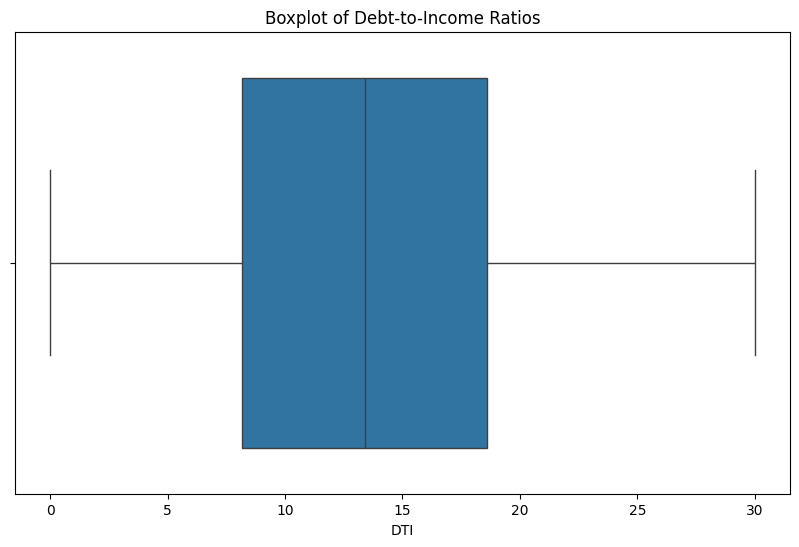

'\nThe boxplot, has the 25th percentile (around 12) to the 75th percentile (around 23), shows the middle 50% of the data. \nThis range indicates where the bulk of DTI ratios lie, showing that most borrowers manage a DTI ratio within this range.\nThe left whisker = 2, indicating that the lower extremes of debt burden are quite minimal.\nThe right whisker = 30, showing that some borrowers are managing much higher levels of debt relative to their income.\n'

In [ ]:
# Identify the range and presence of any outliers in the debt-to-income ratios.
# DTI will give a clear picture of how much % of debt from total income is to be paid off and if payers are able to pay.
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_combined, x='dti')
plt.title('Boxplot of Debt-to-Income Ratios')
plt.xlabel('DTI')
plt.show()

"""
The boxplot, has the 25th percentile (around 12) to the 75th percentile (around 23), shows the middle 50% of the data.
This range indicates where the bulk of DTI ratios lie, showing that most borrowers manage a DTI ratio within this range.
The left whisker = 2, indicating that the lower extremes of debt burden are quite minimal.
The right whisker = 30, showing that some borrowers are managing much higher levels of debt relative to their income.
"""

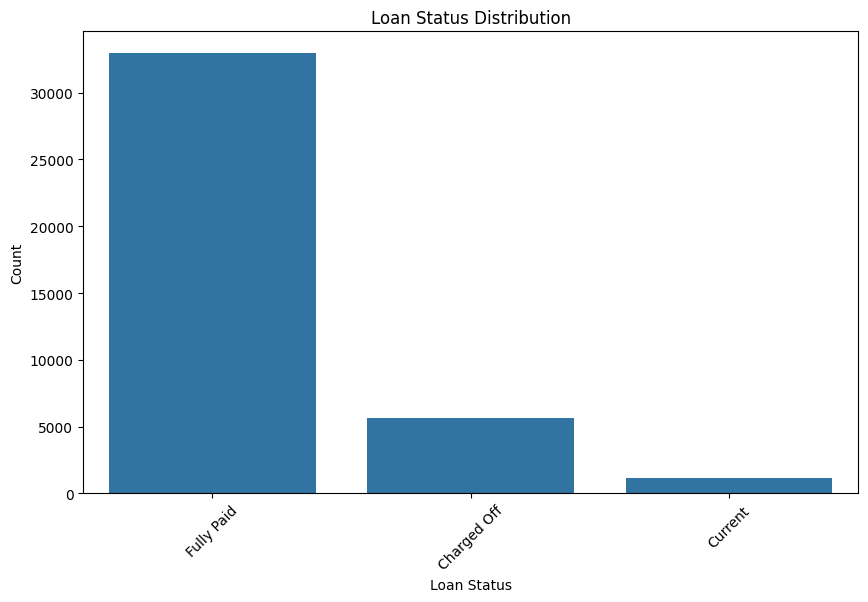

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


In [ ]:
# Loan status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_combined, x='loan_status')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print(loan_combined['loan_status'].value_counts())


### BIVARIATE ANALYSIS -
Exploring relationships between two variables to understand correlations, trends, and potential causal links.

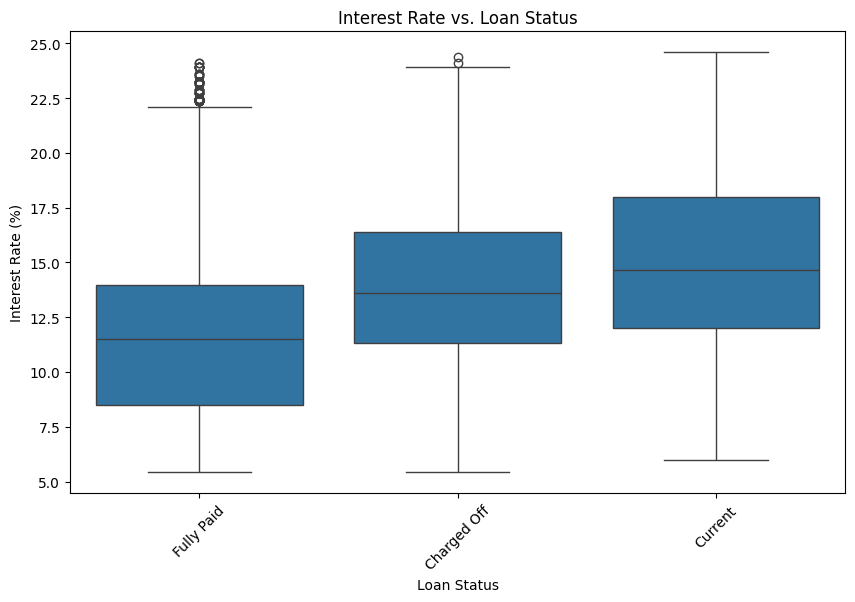

'\nInsight 1 : It is very clear that the bank needs to revisit its interest rate.\nLoan takers have a tendency to not pay back due to financial load owing to increased interest rates. This raises alarm towards the current loans, as the interest rate is very high.\n'

In [ ]:
# Create a boxplot to visualize the relationship between int_rate and loan_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='int_rate', data=loan_combined)
plt.title('Interest Rate vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=45)  # Rotate labels if they overlap or are too long
plt.show()

"""
Insight 1 : It is very clear that the bank needs to revisit its interest rate.
Loan takers have a tendency to not pay back due to financial load owing to increased interest rates. This raises alarm towards the current loans, as the interest rate is very high.
"""

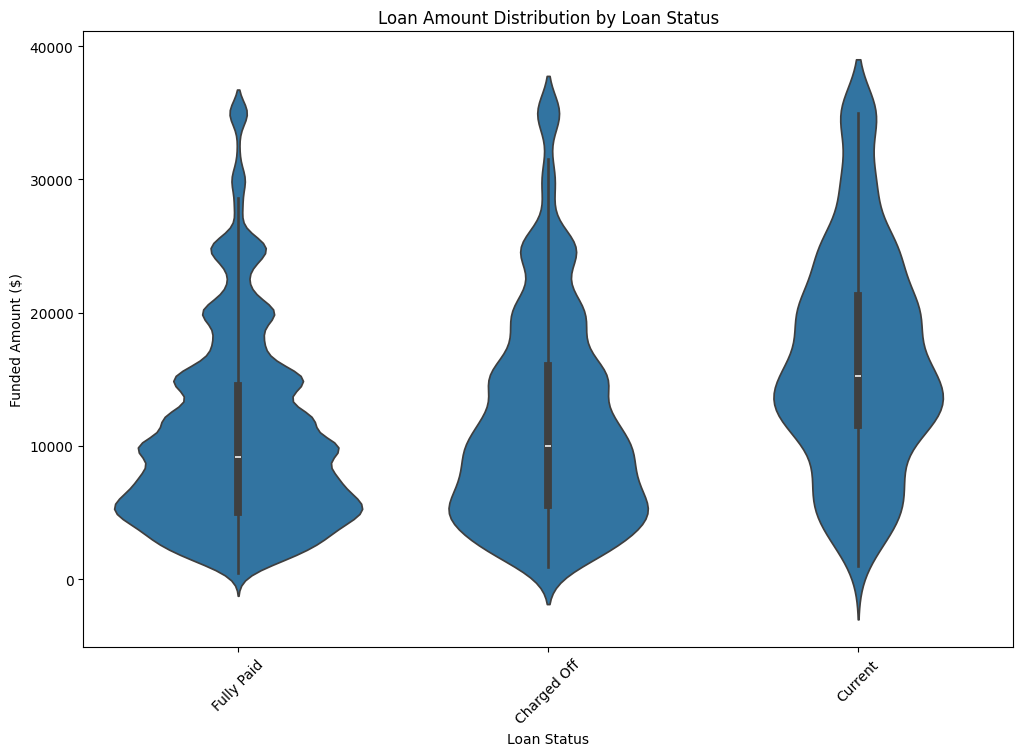

'\nOn an average, the loans amounting to high values have higher risk of being Charged Off as compared to the ones amounting to low value. \nThis provides an indicate to the lending club that any loan application amounting to high value should be scrutinized further, with more verification levels.\n'

In [ ]:
# Create a violin plot for a deeper view into the distribution
plt.figure(figsize=(12, 8))
sns.violinplot(x='loan_status', y='funded_amnt', data=loan_combined)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Funded Amount ($)')
plt.xticks(rotation=45)
plt.show()

"""
On an average, the loans amounting to high values have higher risk of being Charged Off as compared to the ones amounting to low value.
This provides an indicate to the lending club that any loan application amounting to high value should be scrutinized further, with more verification levels.
"""

<BarContainer object of 50 artists>

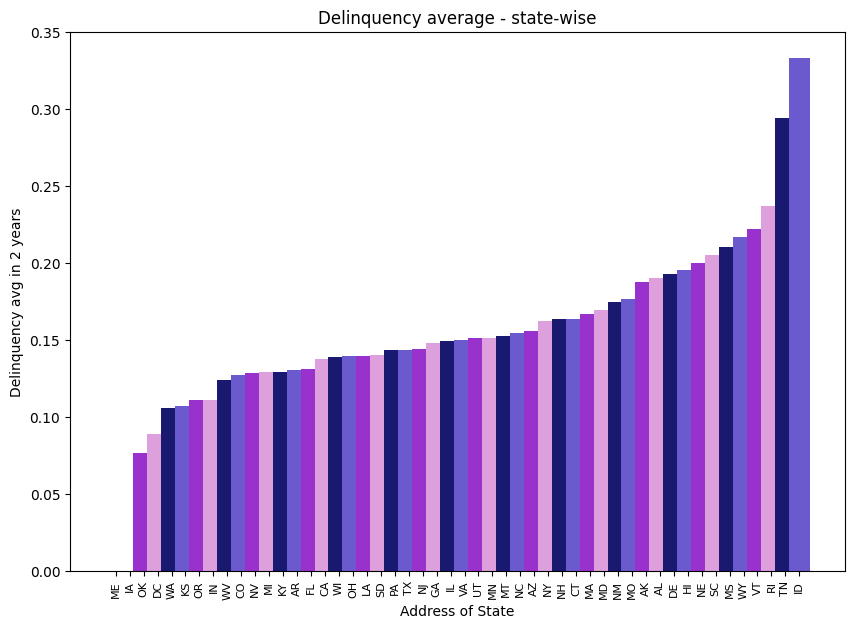

In [ ]:
#Loan-takers prevailing from states Tennesse and Idaho, have a higher delinquence as compared to other states
dfGropupByAddressDelinq2YearAvg = loan_combined.groupby('addr_state').delinq_2yrs.mean()

# sort by sales
dfGropupByAddressDelinq2YearAvg.sort_values(inplace=True)

x = dfGropupByAddressDelinq2YearAvg.index.tolist()
y = dfGropupByAddressDelinq2YearAvg.values.tolist()

fig = plt.figure(figsize =(10, 7))

# set axis labels
plt.xlabel('Address of State')
plt.ylabel('Delinquency avg in 2 years')

# set title
plt.title('Delinquency average - state-wise')

# set xticks
plt.xticks(labels=x, ticks=np.arange(len(x)),rotation='vertical', fontsize=8)

plt.bar(x, y, width = 1.5, color=['midnightblue', 'slateblue', 'darkorchid', 'plum'])

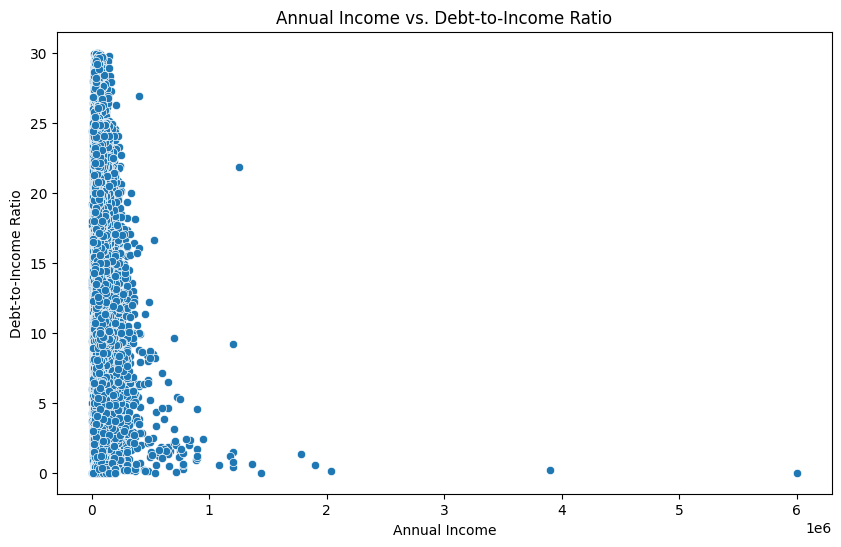

'\nAs income increases, the distribution of DTI ratios tends to compress and lower, suggesting that higher-income earners generally manage lower DTI ratios.\nThis is likely because their higher income provides more financial leeway in managing debt.\n'

In [ ]:
# Scatter plot of Annual Income vs. DTI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_combined, x='annual_inc', y='dti')
plt.title('Annual Income vs. Debt-to-Income Ratio')
plt.xlabel('Annual Income')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

"""
As income increases, the distribution of DTI ratios tends to compress and lower, suggesting that higher-income earners generally manage lower DTI ratios.
This is likely because their higher income provides more financial leeway in managing debt.
"""

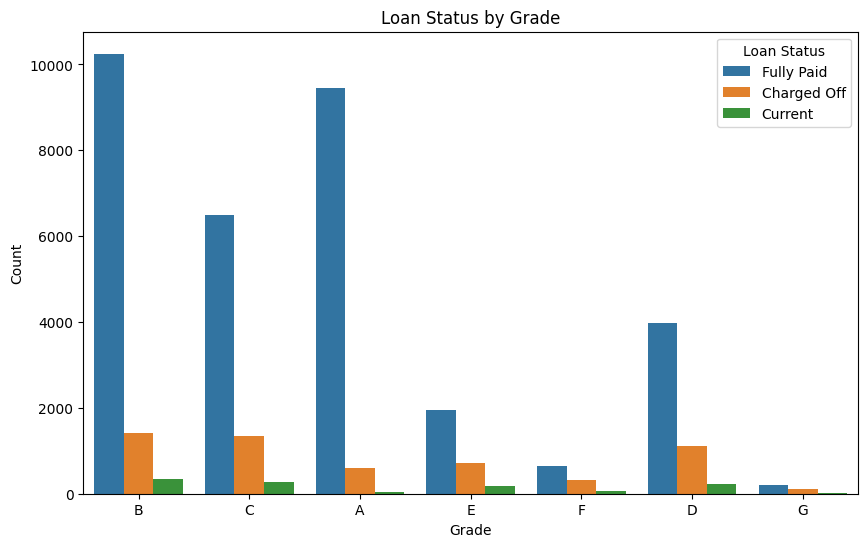

'\nThe frequency of charged off loans increases as the grade worsens, with the highest numbers seen in grades D through G. This trend highlights the increased risk associated with these grades.\nGrade G, despite its lower volume of loans, has a significant proportion of charged off loans, underscoring the high risk associated with lending to borrowers in this category. \nCharge offs for Grade A are comparatively low with the amount of Fully paid loans. \n'

In [ ]:
# Loan status by grade
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_combined, x='grade', hue='loan_status')
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

"""
The frequency of charged off loans increases as the grade worsens, with the highest numbers seen in grades D through G. This trend highlights the increased risk associated with these grades.
Grade G, despite its lower volume of loans, has a significant proportion of charged off loans, underscoring the high risk associated with lending to borrowers in this category.
Charge offs for Grade A are comparatively low with the amount of Fully paid loans.
"""

In [ ]:
# Create a crosstab to see the distribution of loan statuses across loan purposes
purpose_status_crosstab = pd.crosstab(loan_combined['purpose'], loan_combined['loan_status'], normalize='index')

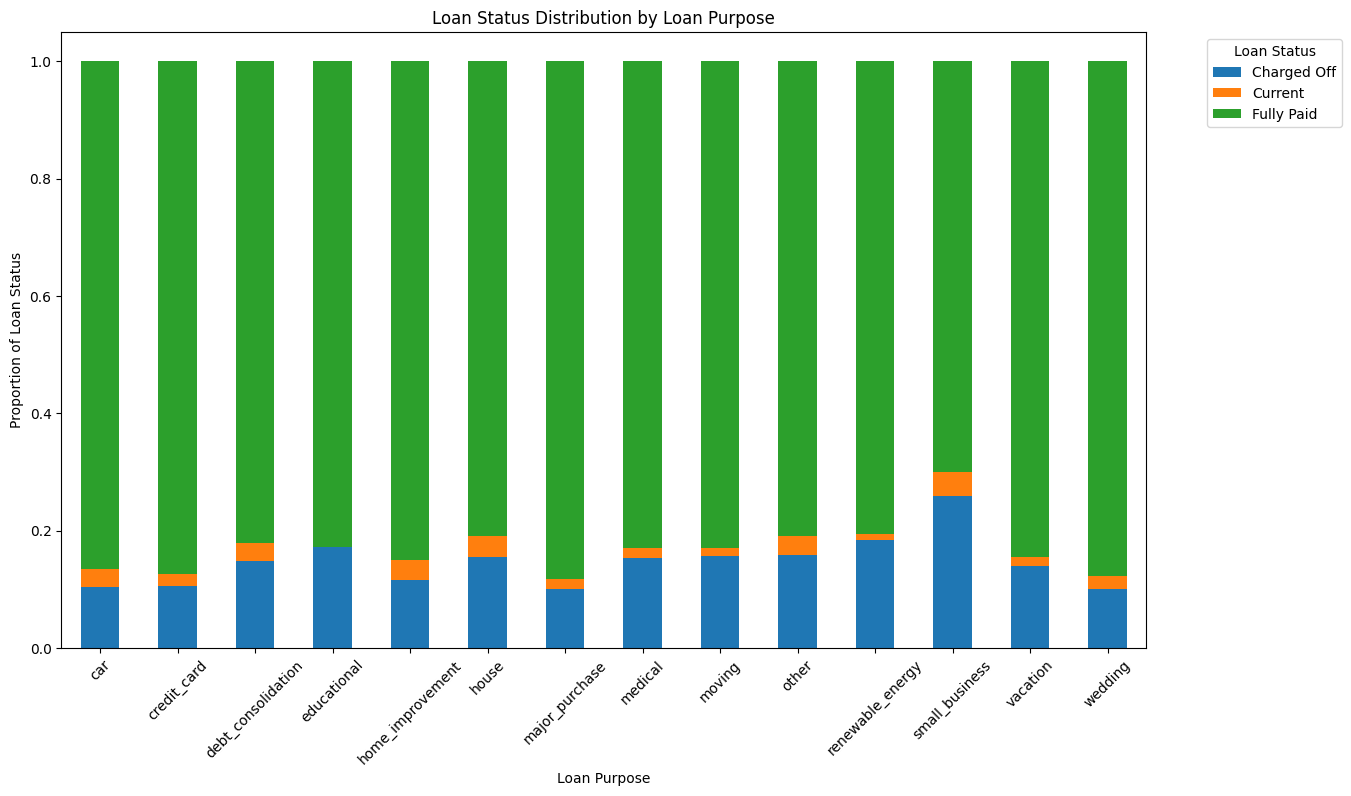

'\nCertain loan purposes like small_business and renewable_energy show a relatively higher proportion of loans being charged off compared to others. \nThis suggests these types of loans carry a higher risk of default.\n'

In [ ]:
# Plotting the crosstab
purpose_status_crosstab.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Loan Status Distribution by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Proportion of Loan Status')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate the labels for better readability
plt.show()

"""
Certain loan purposes like small_business and renewable_energy show a relatively higher proportion of loans being charged off compared to others.
This suggests these types of loans carry a higher risk of default.
"""

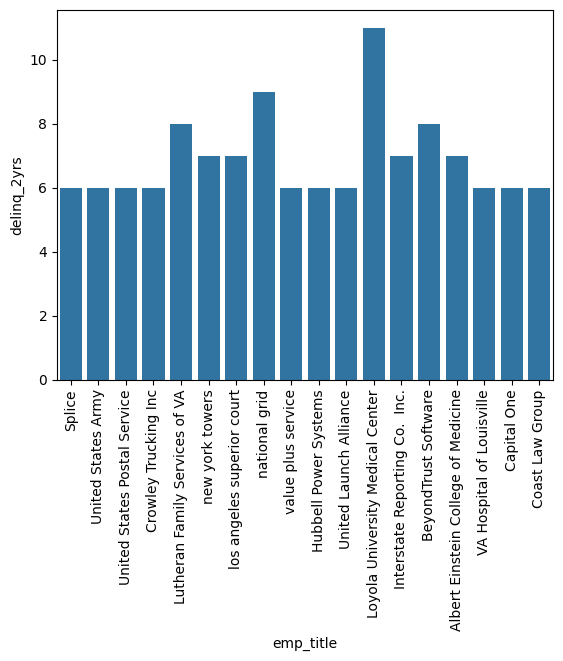

In [ ]:
#### Insight 5 : Applicants with emp_titles :
# 'Loyola University Medical Center',
# 'national grid',
# 'Lutheran Family Services of VA',
# and 'BeyondTrust Software' and few such are more delinquent
# as compared to employees with other titles.
# This is an indicator to the lending club to raise a risk,
# scrutinize pay-backs and perform continuous follow-ups for loans taken by employees of this title.
# And also, while issuing new loans to employees of such titles,
# the lending club can perform thorough backgorund checks to verify the pay-back capability.

higherDelinq = loan_combined[loan_combined['delinq_2yrs'] >= 6]
ax = sns.barplot(x = 'emp_title', y = 'delinq_2yrs', data = higherDelinq)
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

### MULTIVARIATE ANALYSIS
Analyzing the interactions between multiple variables to understand more complex patterns and relationships.

<BarContainer object of 3 artists>

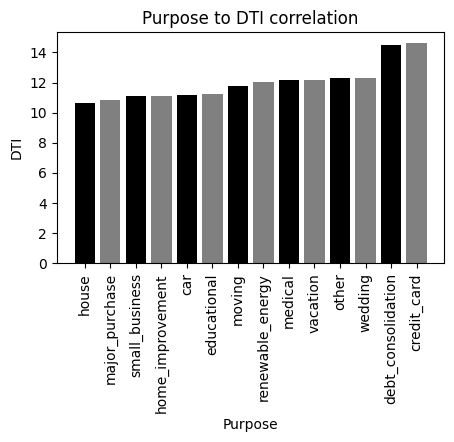

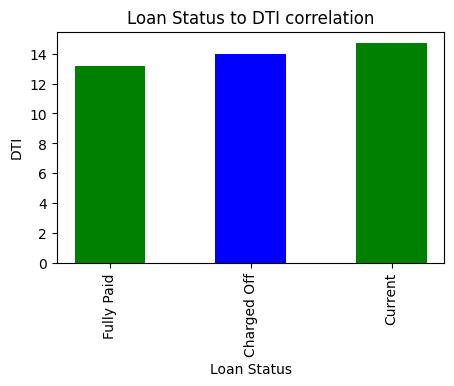

In [ ]:
# Mapping purpose to dti to see if there is a correlation
purposeByDTICorrelation = loan_combined.groupby('purpose').dti.mean()

# sort by sales
purposeByDTICorrelation.sort_values(inplace=True)

x = purposeByDTICorrelation.index.tolist()
y = purposeByDTICorrelation.values.tolist()

fig = plt.figure(figsize =(5, 3))

# set axis labels
plt.xlabel('Purpose')
plt.ylabel('DTI')

# set title
plt.title('Purpose to DTI correlation')

# set xticks
plt.xticks(labels=x, rotation='vertical',ticks=np.arange(len(x)))

plt.bar(x, y, color=['black', 'grey'])

#Code for plot 2 :
loanStatusDtiCorrelation = loan_combined.groupby('loan_status').dti.mean()

# sort by sales
loanStatusDtiCorrelation.sort_values(inplace=True)

x = loanStatusDtiCorrelation.index.tolist()
y = loanStatusDtiCorrelation.values.tolist()

fig = plt.figure(figsize =(5, 3))

# set axis labels
plt.xlabel('Loan Status')
plt.ylabel('DTI')


# set title
plt.title('Loan Status to DTI correlation')

# set xticks
plt.xticks(labels=x, rotation='vertical',ticks=np.arange(len(x)))

plt.bar(x, y, width = 0.5, color=['green', 'blue'])

#Inferences derived from the above 2 plots : It is depicted that the Purposes for loan owing to 'debt_consolidation' and 'credit_card' are the ones with loan takers having higher DTI values. In the second plot, on an average the higher DTI maps to the loans being Charged Off. This concludes that when the Lending Club comes across Purposes listed above, probably the loan should not be approved, or the interest rates should be high. It also indicates high risk for the Current loans falling under these Purposes.

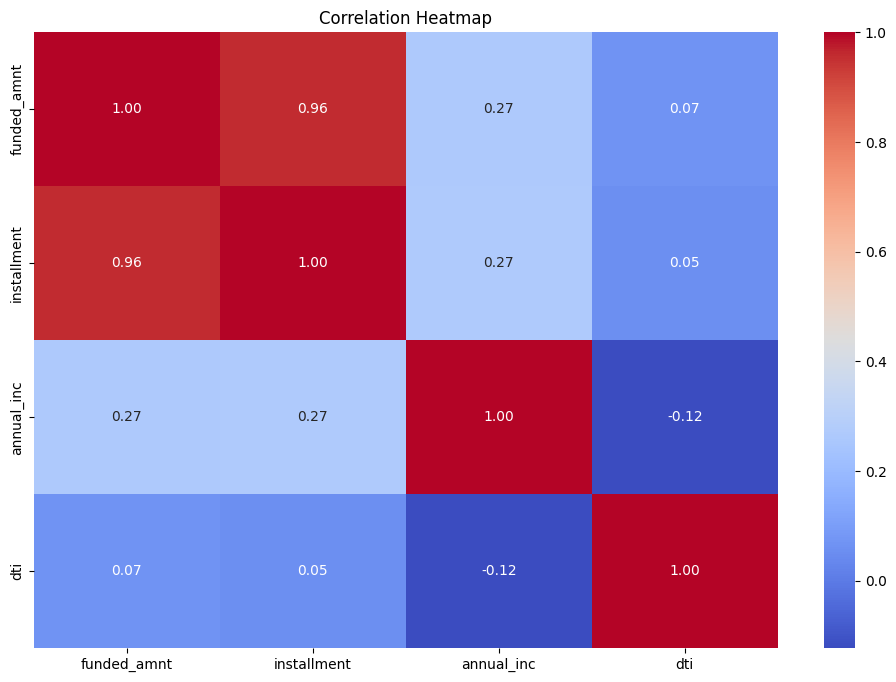

"\n'funded_amnt', 'installment' - Highly correlated indicating that as the loan amount increases, the installment payments increase almost proportionally.\nfunded_amnt and installment have a moderate positive correlation (0.27) with annual_inc. This suggests that borrowers with higher incomes tend to take out larger loans, which subsequently have higher installments.\nDti shows lower correlation with all the three variables.\n"

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = loan_combined[['funded_amnt', 'installment', 'annual_inc', 'dti']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

"""
'funded_amnt', 'installment' - Highly correlated indicating that as the loan amount increases, the installment payments increase almost proportionally.
funded_amnt and installment have a moderate positive correlation (0.27) with annual_inc. This suggests that borrowers with higher incomes tend to take out larger loans, which subsequently have higher installments.
Dti shows lower correlation with all the three variables.
"""

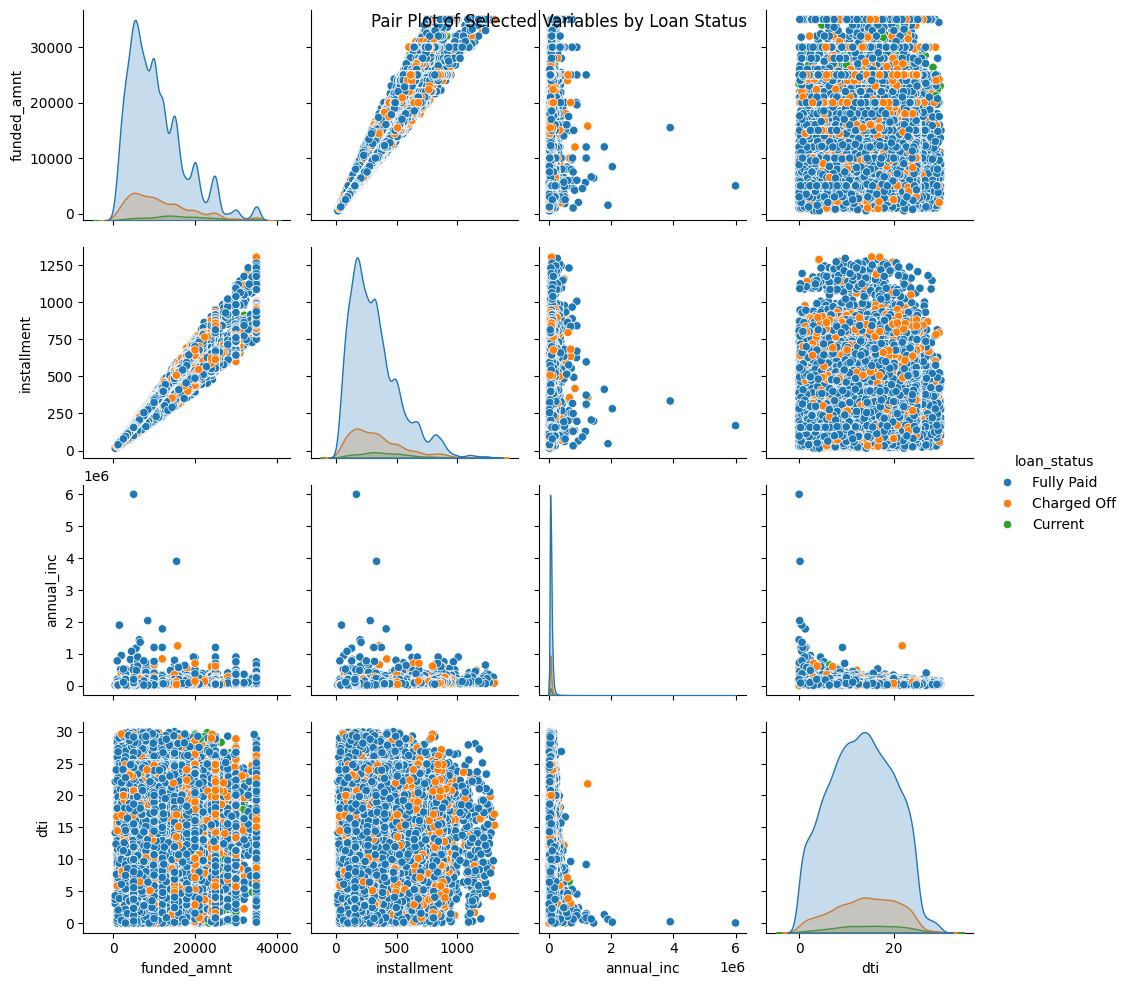

'\nLoan Amount and Installments: The direct correlation suggests that as the loan amount increases, so does the financial burden on the borrower, which can impact the likelihood of repayment.\nIncome Insights: Higher incomes do not necessarily correlate with higher loan amounts, which might suggest a conservative borrowing behavior among higher earners or possibly that they are less represented in the data.\nRisk Factors: Higher DTIs and higher loan amounts seem to correlate with a greater likelihood of a loan being charged off. Lenders might use this information to adjust credit risk assessments or loan terms.\nDebt Management: The broad distribution of DTIs and its relative independence from income suggests that debt management and financial planning are critical across all income levels.\n\n'

In [ ]:
# Pair plot for selected variables
sns.pairplot(data=loan_combined, vars=['funded_amnt', 'installment', 'annual_inc', 'dti'], hue='loan_status')
plt.suptitle('Pair Plot of Selected Variables by Loan Status')
plt.show()

"""
Loan Amount and Installments: The direct correlation suggests that as the loan amount increases, so does the financial burden on the borrower, which can impact the likelihood of repayment.
Income Insights: Higher incomes do not necessarily correlate with higher loan amounts, which might suggest a conservative borrowing behavior among higher earners or possibly that they are less represented in the data.
Risk Factors: Higher DTIs and higher loan amounts seem to correlate with a greater likelihood of a loan being charged off. Lenders might use this information to adjust credit risk assessments or loan terms.
Debt Management: The broad distribution of DTIs and its relative independence from income suggests that debt management and financial planning are critical across all income levels.

"""